# Newcastle Student Dummy Data using TPOT
**By: Amr Ezzat** 

## IMPORT RESOURCES

In [2]:
import tpot
import xgboost 
from tpot import  TPOTClassifier

# Importing ML Packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from __future__ import print_function

# Load EDA packages
import pandas as pd
import numpy as np

In [3]:
# Fetching dataset 
nd = pd.read_csv('/Users/home/Documents/Downloads/Newcastle.csv', engine ='python')

In [4]:
nd.head()

,University,Student ID,Course,Grade (Class),Internship,Job within 6 months
0,Newcastle University,1,Dance,Second Lower,4,True
1,Newcastle University,2,History,Second Lower,2,False
2,Newcastle University,3,History,Third,4,True
3,Newcastle University,4,Geography,Third,2,False
4,Newcastle University,5,History,Second Lower,4,True


In [5]:
# Checking Number of columns and rows are correct
print ("Rows     : " ,nd.shape[0])
print ("Columns  : " ,nd.shape[1])

Rows     :  1000
Columns  :  6


In [6]:
# Check the data type of variables (Only Numerical values are accepted by TPOT)
nd.dtypes

University             object
Student ID              int64
Course                 object
Grade (Class)          object
Internship              int64
Job within 6 months      bool
dtype: object

## DATA PREPARATION 

In [7]:
# Coverting catigorical values

uni=nd.columns[0]
course= nd.columns[2]
grade = nd.columns[3]
job=nd.columns[5]

course_mapper = {'Computer Science': 1 , 'Business': 2,'Geography': 3,'History': 4,'Dance': 5}
grade_mapper = {'First': 1, 'Second Upper': 2.1,'Second Lower': 2.2, 'Third': 3 }
uni_mapper = {'Newcastle University': 1}


nd[course].replace(course_mapper, inplace= True)
nd[grade].replace(grade_mapper, inplace= True)
nd[uni].replace(uni_mapper, inplace= True) 

In [8]:
# Course and Grade data type changed successfully. 
nd.dtypes

University               int64
Student ID               int64
Course                   int64
Grade (Class)          float64
Internship               int64
Job within 6 months       bool
dtype: object

In [9]:
nd

,University,Student ID,Course,Grade (Class),Internship,Job within 6 months
0,1,1,5,2.2,4,True
1,1,2,4,2.2,2,False
2,1,3,4,3.0,4,True
3,1,4,3,3.0,2,False
4,1,5,4,2.2,4,True
...,...,...,...,...,...,...
995,1,996,5,1.0,0,True
996,1,997,3,2.1,2,False
997,1,998,4,2.2,1,False
998,1,999,5,3.0,0,False


In [10]:
# Checking for missing data
nd.isnull().sum()

University             0
Student ID             0
Course                 0
Grade (Class)          0
Internship             0
Job within 6 months    0
dtype: int64

In [11]:
# Arrange data (Remove 'Job within 6 months'', set 'Job within 6 months'as the value we want to predict)
X = nd.drop(job, axis=1)
y = nd[job]

## TRAIN TEST SPLIT

In [12]:
# Splitting data 80% training data 20% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2)

In [13]:
# Checking the split was done properly
X_train

,University,Student ID,Course,Grade (Class),Internship
584,1,585,5,1.0,0
575,1,576,5,2.2,3
478,1,479,2,2.2,4
767,1,768,1,3.0,1
494,1,495,3,2.2,0
...,...,...,...,...,...
967,1,968,3,2.2,2
574,1,575,5,2.2,3
975,1,976,4,2.1,1
454,1,455,1,2.1,1


## TPOT

In [22]:
tpot =  TPOTClassifier(max_time_mins = 10,verbosity=2, random_state = 45, scoring='accuracy')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Generation 6 - Current best internal CV score: 1.0

Generation 7 - Current best internal CV score: 1.0

10.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=18, min_samples_split=8, n_estimators=100)
1.0


In [23]:
# Evaluating the model on the test set calling the score function  
print(tpot.score(X_test, y_test))

1.0


In [24]:
tpot.fitted_pipeline_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_features=0.6500000000000001,
                                        min_samples_leaf=18,
                                        min_samples_split=8,
                                        random_state=45))])

## VISUAL RESULT

In [25]:
exctracted_best_model = tpot.fitted_pipeline_.steps[-1][1]

In [26]:
exctracted_best_model.fit(X_train, y_train) 

RandomForestClassifier(max_features=0.6500000000000001, min_samples_leaf=18,
                       min_samples_split=8, random_state=45)

In [27]:
# Getting feature importance
arr = exctracted_best_model.feature_importances_
arr

array([0.        , 0.00788577, 0.35416912, 0.25639278, 0.38155233])

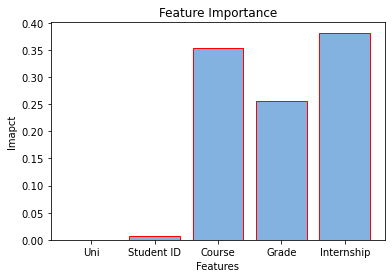

In [28]:
# Print feature importance using matpotlib
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Create dataset
height = arr
bars = ('Uni','Student ID', 'Course', 'Grade', 'Internship')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = (0.2, 0.5, 0.8, 0.6), edgecolor='red')
 
# Add title and axis names
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Imapct')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

In [21]:
# Export Python Code
tpot.export('tpot_newcastle_pipeline.py')